In [1]:
import cv2
import matplotlib.pyplot
import numpy
import os
import scipy
# import seaborn
import sklearn.metrics

### Problem 1. Discriminant functions

In [2]:
def gen_data(
    m: numpy.ndarray,
    c: numpy.ndarray,
    size: int
) -> tuple[scipy.stats._multivariate.multivariate_normal_gen, numpy.ndarray]:
    rv = scipy.stats.multivariate_normal(mean=m, cov=c)
    data = rv.rvs(size=size, random_state=None)

    return rv, data.T

In [3]:
def disc_fn(mu: numpy.ndarray, c: numpy.ndarray) -> tuple[numpy.ndarray, numpy.ndarray, numpy.ndarray]:
    mu = numpy.reshape(a=mu, newshape=(-1, 1))
    W = -0.5*scipy.linalg.inv(a=c)
    w = scipy.linalg.inv(a=c)@mu
    b = -0.5*mu.T@scipy.linalg.inv(a=c)@mu-0.5*numpy.log(scipy.linalg.det(a=c))+numpy.log(0.5)

    return W, w, b

In [4]:
def plt_decision_boundary(
    rv0: scipy.stats._multivariate.multivariate_normal_gen,
    rv1: scipy.stats._multivariate.multivariate_normal_gen,
    mu0: numpy.ndarray,
    mu1: numpy.ndarray,
    data0: numpy.ndarray,
    data1: numpy.ndarray,
    marker_size: int,
    rad: int,
    num_pts: int,
    levels: int,
    disc_x: numpy.ndarray,
    disc_y: numpy.ndarray,
    label: str,
) -> None:
    fig, ax = matplotlib.pyplot.subplots(figsize=(8, 6))
    matplotlib.pyplot.rc(group="font", family="serif")
    matplotlib.pyplot.scatter(x=data0[0, :], y=data0[1, :], s=marker_size, c="cyan", marker='x')
    matplotlib.pyplot.scatter(x=data1[0, :], y=data1[1, :], s=marker_size, c="orange", marker='o')
    # seaborn.kdeplot(x=data0[0, :], y=data0[1, :], levels=levels, color="silver", alpha=0.35)
    # seaborn.kdeplot(x=data1[0, :], y=data1[1, :], levels=levels, color="silver", alpha=0.35)
    matplotlib.pyplot.plot(disc_x, disc_y, color="magenta", label=label)
    x, y = numpy.meshgrid(numpy.linspace(start=mu0[0]-rad, stop=mu0[0]+rad, num=num_pts),
                          numpy.linspace(start=mu0[1]-rad, stop=mu0[1]+rad, num=num_pts))
    grid = numpy.dstack(tup=(x, y))
    pdf_vals = rv0.pdf(x=grid)
    matplotlib.pyplot.contour(x, y, pdf_vals, levels=levels, colors="silver", alpha=0.5)
    x, y = numpy.meshgrid(numpy.linspace(start=mu1[0]-rad, stop=mu1[0]+rad, num=num_pts),
                          numpy.linspace(start=mu1[1]-rad, stop=mu1[1]+rad, num=num_pts))
    grid = numpy.dstack(tup=(x, y))
    pdf_vals = rv1.pdf(x=grid)
    matplotlib.pyplot.contour(x, y, pdf_vals, levels=levels, colors="silver", alpha=0.5)
    matplotlib.pyplot.axis("equal")
    matplotlib.pyplot.xlabel(r"$x$")
    matplotlib.pyplot.ylabel(r"$y$")
    matplotlib.pyplot.legend()
    matplotlib.pyplot.show()

    return

##### Problem 1 (a)

In [5]:
mu0 = numpy.array(object=[0, 0], dtype=numpy.float32)
c0 = numpy.array(object=[[1, 0], [0, 1]], dtype=numpy.float32)
mu1 = numpy.array(object=[4, 0], dtype=numpy.float32)
c1 = numpy.array(object=[[1, 0], [0, 1]], dtype=numpy.float32)

rv0, data0 = gen_data(m=mu0, c=c0, size=100)
rv1, data1 = gen_data(m=mu1, c=c1, size=100)

W0, w0, b0 = disc_fn(mu=mu0, c=c0)
print("W0", "w0", "b0")
print(W0)
print(w0)
print(b0)

W1, w1, b1 = disc_fn(mu=mu1, c=c1)
print()
print("W1", "w1", "b1")
print(W1)
print(w1)
print(b1)

W0 w0 b0
[[-0.5  0. ]
 [-0.  -0.5]]
[[0.]
 [0.]]
[[-0.6931472]]

W1 w1 b1
[[-0.5  0. ]
 [-0.  -0.5]]
[[4.]
 [0.]]
[[-8.693148]]


\begin{align}
    g_{0}(\mathbf{x}) &=
    \mathbf{x}^{\intercal}\mathbf{W_{0}}^{\intercal}\mathbf{x}+\mathbf{w_{0}}^{\intercal}\mathbf{x}+b_{0} \\
    &= \begin{bmatrix}x_{0} \\ x_{1}\end{bmatrix}^{\intercal}
    \begin{bmatrix} -0.5 & 0 \\ 0 & -0.5 \end{bmatrix}^{\intercal}\begin{bmatrix}x_{0} \\ x_{1}\end{bmatrix} +
    \begin{bmatrix} 0 \\ 0\end{bmatrix}^{\intercal}\begin{bmatrix}x_{0} \\ x_{1}\end{bmatrix}
    -0.6931472 \\
    &= -0.5x_{0}^{2}-0.5x_{1}^{2}-0.693148
\end{align}

\begin{align}    
    g_{1}(\mathbf{x}) &=
    \mathbf{x}^{\intercal}\mathbf{W_{1}}^{\intercal}\mathbf{x}+\mathbf{w_{1}}^{\intercal}\mathbf{x}+b_{1} \\
    &= \begin{bmatrix}x_{0} \\ x_{1}\end{bmatrix}^{\intercal}
    \begin{bmatrix} -0.5 & 0 \\ 0 & -0.5 \end{bmatrix}^{\intercal}\begin{bmatrix}x_{0} \\ x_{1}\end{bmatrix} +
    \begin{bmatrix} 4 \\ 0\end{bmatrix}^{\intercal}\begin{bmatrix}x_{0} \\ x_{1}\end{bmatrix}
    -8.693148 \\
    &= -0.5x_{0}^{2}-0.5x_{1}^{2}+4x_{0}-8.693148
\end{align}

\begin{align}
    g_{0}(\mathbf{x}) &= g_{1}(\mathbf{x}) \\
    -0.5x_{0}^{2}-0.5x_{1}^{2}-0.693148 &= -0.5x_{0}^{2}-0.5x_{1}^{2}+4x_{0}-8.693148 \\
    4x_{0} &= 8 \\
    x_{0} &= 2
\end{align}

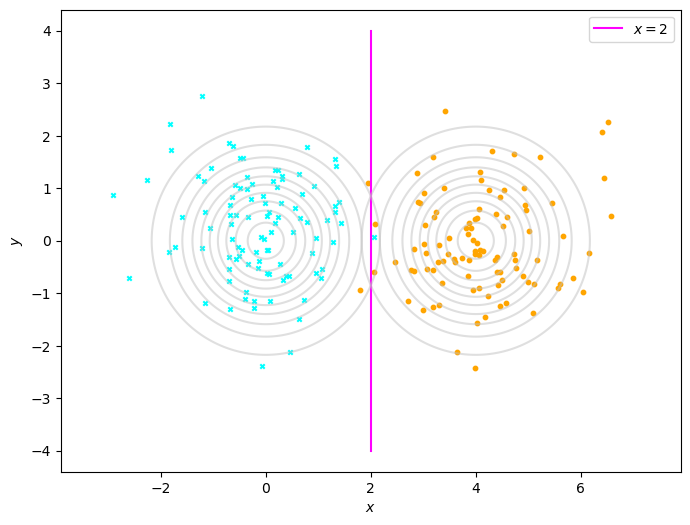

In [6]:
y = numpy.linspace(start=-4, stop=4, num=500)
x = numpy.full(shape=y.shape, fill_value=2)

plt_decision_boundary(
    rv0=rv0,
    rv1=rv1,
    mu0=mu0,
    mu1=mu1,
    data0=data0,
    data1=data1,
    marker_size=10,
    rad=3,
    num_pts=500,
    levels=10,
    disc_x=x,
    disc_y=y,
    label="$x=2$"
)

##### Problem 1 (b)

In [7]:
mu0 = numpy.array(object=[0, 0], dtype=numpy.float32)
c0 = numpy.array(object=[[1, 0], [0, 2]], dtype=numpy.float32)
mu1 = numpy.array(object=[4, 3], dtype=numpy.float32)
c1 = numpy.array(object=[[1, 0], [0, 1]], dtype=numpy.float32)

rv0, data0 = gen_data(m=mu0, c=c0, size=100)
rv1, data1 = gen_data(m=mu1, c=c1, size=100)

W0, w0, b0 = disc_fn(mu=mu0, c=c0)
print("W0", "w0", "b0")
print(W0)
print(w0)
print(b0)

W1, w1, b1 = disc_fn(mu=mu1, c=c1)
print()
print("W1", "w1", "b1")
print(W1)
print(w1)
print(b1)

W0 w0 b0
[[-0.5   0.  ]
 [-0.   -0.25]]
[[0.]
 [0.]]
[[-1.0397208]]

W1 w1 b1
[[-0.5  0. ]
 [-0.  -0.5]]
[[4.]
 [3.]]
[[-13.193148]]


\begin{align}
    g_{0}(\mathbf{x}) &=
    \mathbf{x}^{\intercal}\mathbf{W_{0}}^{\intercal}\mathbf{x}+\mathbf{w_{0}}^{\intercal}\mathbf{x}+b_{0} \\
    &= \begin{bmatrix}x_{0} \\ x_{1}\end{bmatrix}^{\intercal}
    \begin{bmatrix} -0.5 & 0 \\ 0 & -0.25 \end{bmatrix}^{\intercal}\begin{bmatrix}x_{0} \\ x_{1}\end{bmatrix} +
    \begin{bmatrix} 0 \\ 0\end{bmatrix}^{\intercal}\begin{bmatrix}x_{0} \\ x_{1}\end{bmatrix}
    -1.0397208 \\
    &= -0.5x_{0}^{2}-0.25x_{1}^{2}-1.0397208
\end{align}

\begin{align}    
    g_{1}(\mathbf{x}) &=
    \mathbf{x}^{\intercal}\mathbf{W_{1}}^{\intercal}\mathbf{x}+\mathbf{w_{1}}^{\intercal}\mathbf{x}+b_{1} \\
    &= \begin{bmatrix}x_{0} \\ x_{1}\end{bmatrix}^{\intercal}
    \begin{bmatrix} -0.5 & 0 \\ 0 & -0.5 \end{bmatrix}^{\intercal}\begin{bmatrix}x_{0} \\ x_{1}\end{bmatrix} +
    \begin{bmatrix} 4 \\ 3\end{bmatrix}^{\intercal}\begin{bmatrix}x_{0} \\ x_{1}\end{bmatrix}
    -13.193148 \\
    &= -0.5x_{0}^{2}-0.5x_{1}^{2}+4x_{0}+3x_{1}-13.193148
\end{align}

\begin{align}
    g_{0}(\mathbf{x}) &= g_{1}(\mathbf{x}) \\
    -0.5x_{0}^{2}-0.25x_{1}^{2}-1.0397208 &= -0.5x_{0}^{2}-0.5x_{1}^{2}+4x_{0}+3x_{1}-13.193148 \\
    0.25x_{1}^{2}-3x_{1}+12.1534272 &= 4x_{0} \\
    x_{0} &= \frac{0.25x_{1}^{2}-3x_{1}-12.1534272}{4}
\end{align}

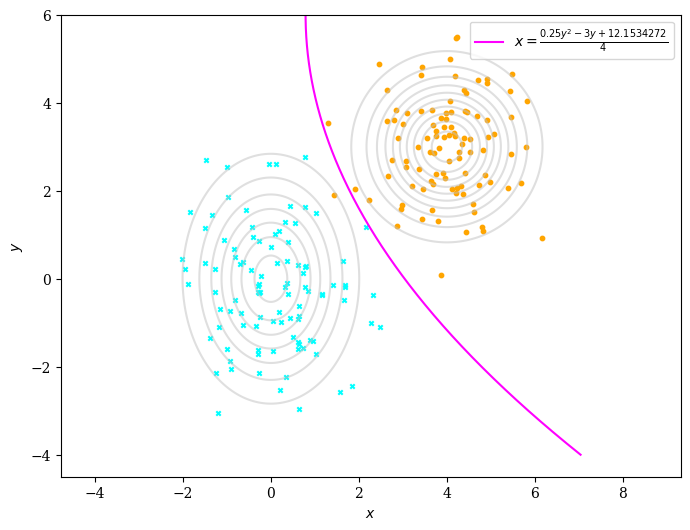

In [8]:
y = numpy.linspace(start=-4, stop=6, num=500)
x = (0.25*y**2-3*y+12.1534272)/4.0

plt_decision_boundary(
    rv0=rv0,
    rv1=rv1,
    mu0=mu0,
    mu1=mu1,
    data0=data0,
    data1=data1,
    marker_size=10,
    rad=3,
    num_pts=500,
    levels=10,
    disc_x=x,
    disc_y=y,
    label="$x=\\frac{0.25y^{2}-3y+12.1534272}{4}$"
)

##### Problem 1 (c)

In [9]:
mu0 = numpy.array(object=[0, 0], dtype=numpy.float32)
c0 = numpy.array(object=[[1, 0], [0, 2]], dtype=numpy.float32)
mu1 = numpy.array(object=[0.5, 0], dtype=numpy.float32)
c1 = numpy.array(object=[[1, 0], [0, 1]], dtype=numpy.float32)

rv0, data0 = gen_data(m=mu0, c=c0, size=100)
rv1, data1 = gen_data(m=mu1, c=c1, size=100)

W0, w0, b0 = disc_fn(mu=mu0, c=c0)
print("W0", "w0", "b0")
print(W0)
print(w0)
print(b0)

W1, w1, b1 = disc_fn(mu=mu1, c=c1)
print()
print("W1", "w1", "b1")
print(W1)
print(w1)
print(b1)

W0 w0 b0
[[-0.5   0.  ]
 [-0.   -0.25]]
[[0.]
 [0.]]
[[-1.0397208]]

W1 w1 b1
[[-0.5  0. ]
 [-0.  -0.5]]
[[0.5]
 [0. ]]
[[-0.8181472]]


\begin{align}
    g_{0}(\mathbf{x}) &=
    \mathbf{x}^{\intercal}\mathbf{W_{0}}^{\intercal}\mathbf{x}+\mathbf{w_{0}}^{\intercal}\mathbf{x}+b_{0} \\
    &= \begin{bmatrix}x_{0} \\ x_{1}\end{bmatrix}^{\intercal}
    \begin{bmatrix} -0.5 & 0 \\ 0 & -0.25 \end{bmatrix}^{\intercal}\begin{bmatrix}x_{0} \\ x_{1}\end{bmatrix} +
    \begin{bmatrix} 0 \\ 0\end{bmatrix}^{\intercal}\begin{bmatrix}x_{0} \\ x_{1}\end{bmatrix}
    -1.0397208 \\
    &= -0.5x_{0}^{2}-0.25x_{1}^{2}-1.0397208
\end{align}

\begin{align}    
    g_{1}(\mathbf{x}) &=
    \mathbf{x}^{\intercal}\mathbf{W_{1}}^{\intercal}\mathbf{x}+\mathbf{w_{1}}^{\intercal}\mathbf{x}+b_{1} \\
    &= \begin{bmatrix}x_{0} \\ x_{1}\end{bmatrix}^{\intercal}
    \begin{bmatrix} -0.5 & 0 \\ 0 & -0.5 \end{bmatrix}^{\intercal}\begin{bmatrix}x_{0} \\ x_{1}\end{bmatrix} +
    \begin{bmatrix} 0.5 \\ 0\end{bmatrix}^{\intercal}\begin{bmatrix}x_{0} \\ x_{1}\end{bmatrix}
    -0.8181472 \\
    &= -0.5x_{0}^{2}-0.5x_{1}^{2}+0.5x_{0}-0.8181472
\end{align}

\begin{align}
    g_{0}(\mathbf{x}) &= g_{1}(\mathbf{x}) \\
    -0.5x_{0}^{2}-0.25x_{1}^{2}-1.0397208 &= -0.5x_{0}^{2}-0.5x_{1}^{2}+0.5x_{0}-0.8181472 \\
    0.25x_{1}^{2}-0.2215736 &= 0.5x_{0} \\
    x_{0} &= \frac{0.25x_{1}^{2}-0.2215736}{0.5}
\end{align}

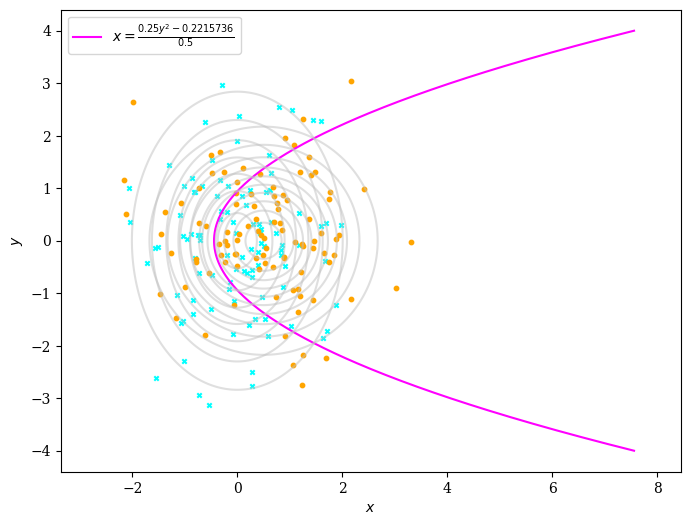

In [10]:
y = numpy.linspace(start=-4, stop=4, num=500)
x = (0.25*y**2-0.2215736)/0.5

plt_decision_boundary(
    rv0=rv0,
    rv1=rv1,
    mu0=mu0,
    mu1=mu1,
    data0=data0,
    data1=data1,
    marker_size=10,
    rad=3,
    num_pts=500,
    levels=10,
    disc_x=x,
    disc_y=y,
    label="$x=\\frac{0.25y^{2}-0.2215736}{0.5}$"
)

##### Problem 1 (d)

In [11]:
mu0 = numpy.array(object=[0, 0], dtype=numpy.float32)
c0 = numpy.array(object=[[1, 0], [0, 2]], dtype=numpy.float32)
mu1 = numpy.array(object=[4, 0], dtype=numpy.float32)
c1 = numpy.array(object=[[2, 0], [0, 1]], dtype=numpy.float32)

rv0, data0 = gen_data(m=mu0, c=c0, size=100)
rv1, data1 = gen_data(m=mu1, c=c1, size=100)

W0, w0, b0 = disc_fn(mu=mu0, c=c0)
print("W0", "w0", "b0")
print(W0)
print(w0)
print(b0)

W1, w1, b1 = disc_fn(mu=mu1, c=c1)
print()
print("W1", "w1", "b1")
print(W1)
print(w1)
print(b1)

W0 w0 b0
[[-0.5   0.  ]
 [-0.   -0.25]]
[[0.]
 [0.]]
[[-1.0397208]]

W1 w1 b1
[[-0.25  0.  ]
 [-0.   -0.5 ]]
[[2.]
 [0.]]
[[-5.039721]]


\begin{align}
    g_{0}(\mathbf{x}) &=
    \mathbf{x}^{\intercal}\mathbf{W_{0}}^{\intercal}\mathbf{x}+\mathbf{w_{0}}^{\intercal}\mathbf{x}+b_{0} \\
    &= \begin{bmatrix}x_{0} \\ x_{1}\end{bmatrix}^{\intercal}
    \begin{bmatrix} -0.5 & 0 \\ 0 & -0.25 \end{bmatrix}^{\intercal}\begin{bmatrix}x_{0} \\ x_{1}\end{bmatrix} +
    \begin{bmatrix} 0 \\ 0\end{bmatrix}^{\intercal}\begin{bmatrix}x_{0} \\ x_{1}\end{bmatrix}
    -1.039721 \\
    &= -0.5x_{0}^{2}-0.25x_{1}^{2}-1.039721
\end{align}

\begin{align}    
    g_{1}(\mathbf{x}) &=
    \mathbf{x}^{\intercal}\mathbf{W_{1}}^{\intercal}\mathbf{x}+\mathbf{w_{1}}^{\intercal}\mathbf{x}+b_{1} \\
    &= \begin{bmatrix}x_{0} \\ x_{1}\end{bmatrix}^{\intercal}
    \begin{bmatrix} -0.25 & 0 \\ 0 & -0.5 \end{bmatrix}^{\intercal}\begin{bmatrix}x_{0} \\ x_{1}\end{bmatrix} +
    \begin{bmatrix} 2 \\ 0\end{bmatrix}^{\intercal}\begin{bmatrix}x_{0} \\ x_{1}\end{bmatrix}
    -5.039721 \\
    &= -0.25x_{0}^{2}-0.5x_{1}^{2}+2x_{0}-5.039721
\end{align}

\begin{align}
    g_{0}(\mathbf{x}) &= g_{1}(\mathbf{x}) \\
    -0.5x_{0}^{2}-0.25x_{1}^{2}-1.039721 &= -0.25x_{0}^{2}-0.5x_{1}^{2}+2x_{0}-5.039721 \\
    -0.25x_{0}^{2}-2x_{0} &= -0.25x_{1}^{2}-4 \\
    0.25x_{0}^{2}+2x_{0} &= 0.25x_{1}^{2}+4 \\
    x_{0}^{2}+8x_{0} &= x_{1}^{2}+16 \\
    x_{0}^{2}+8x_{0}+16 &= x_{1}^{2}+32 \\
    (x_{0}+4)^{2} &= x_{1}^{2}+32 \\
    x_{0}+4 &= \pm\sqrt{x_{1}^{2}+32} \\
    x_{0} &= -4\pm\sqrt{x_{1}^{2}+32} \\
    x_{0} &= -4+\sqrt{x_{1}^{2}+32}
\end{align}

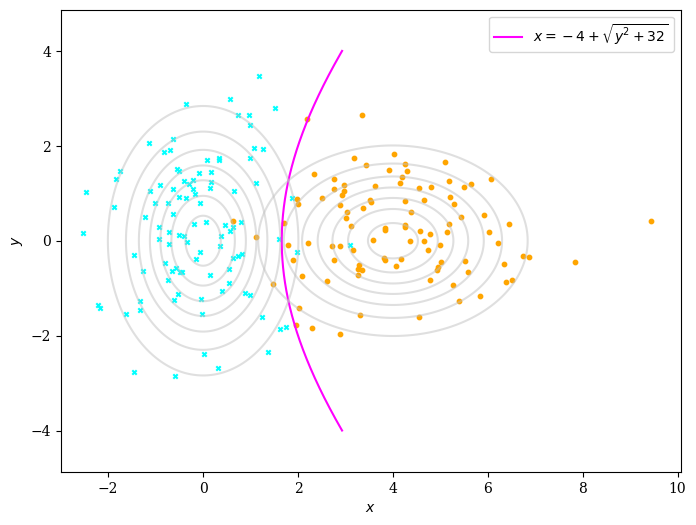

In [12]:
y = numpy.linspace(start=-4, stop=4, num=500)
x = -4+(y**2+32)**0.5

plt_decision_boundary(
    rv0=rv0,
    rv1=rv1,
    mu0=mu0,
    mu1=mu1,
    data0=data0,
    data1=data1,
    marker_size=10,
    rad=3,
    num_pts=500,
    levels=10,
    disc_x=x,
    disc_y=y,
    label="$x=-4+\sqrt{y^{2}+32}$"
)

### Problem 2. Handwritten digit recognition

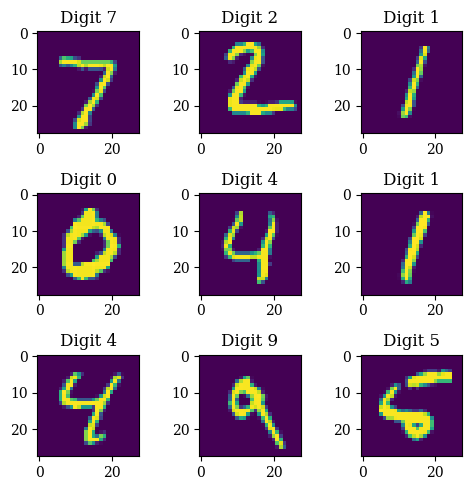

In [13]:
f = numpy.load(file="digits-labels.npz")

data = f['d']       # [vec(digit) x # of digits]    [(28x28) x 10000] 
labels = f['l']     # [# of digits]                 [10000]           

matplotlib.pyplot.rc('font', family='serif')
fig, axs = matplotlib.pyplot.subplots(3, 3, figsize=(5, 5))
matplotlib.pyplot.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, wspace=0.0, hspace=0.0)

idx = 0
for i in range(3):
    for j in range(3):
        axs[i, j].imshow(X=numpy.reshape(a=data[:, idx], newshape=(28, 28), order='F'))
        axs[i, j].set_title(rf"Digit %s" % str(labels[idx]))
        idx += 1

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [41]:
class PCA():
    def __init__(self, num_components: int) -> None:
        self.num_components = num_components

        return

    def _X_mean(self, X: numpy.ndarray) -> numpy.ndarray:
        X_mean = numpy.mean(a=X, axis=1, keepdims=True)   # mean of matrix X  [X, ]
        one_vec = numpy.ones(shape=(1, X.shape[1]))       # [1 x observations]
        X_mean_mat = X_mean@one_vec                       # features mean matrix   [# of features x # of samples]
        X_mean_center = X - X_mean_mat                    # mean-centered matrix X [# of features x # of samples]

        return X_mean_center

    def fit_transform(self, X: numpy.ndarray) -> tuple[numpy.ndarray, numpy.ndarray]:
        X_mean_center = self._X_mean(X=X)
        C = numpy.cov(m=X_mean_center, rowvar=True, bias=False)
        eigenvals, eigenvecs = scipy.linalg.eig(a=C)
        eigenval_indices = numpy.argsort(a=eigenvals)[::-1]
        eigenvals = eigenvals[eigenval_indices].real
        eigenvecs = eigenvecs[:, eigenval_indices].real
        Lambda = scipy.linalg.inv(a=numpy.diag(v=numpy.sqrt(eigenvals[:self.num_components])))
        U = eigenvecs[:, :self.num_components]
        W = Lambda@U.T
        Y = W@X_mean_center

        return W, Y

    def reconstruct(self, X: numpy.ndarray) -> numpy.ndarray:
        X_mean_mat, X_mean_center = self._X_mean(X=X)
        Z = self.U[:, :self.num_components].T@X_mean_center
        X_hat = self.U[:, :self.num_components]@Z+X_mean_mat

        return X_hat

In [42]:
class GM():
    def __init__(self) -> None:
        self.mu = None
        self.cov = None
        self.w = None

        return

    def fit(self, X: numpy.ndarray) -> None:
        self.mu = numpy.mean(a=X, axis=1, keepdims=True)
        self.cov = numpy.cov(m=X, rowvar=True)
        self.w = numpy.array([1.0])

        return

    def pdf(self, x: numpy.ndarray) -> float:
        d = x.shape[0]
        const = 1.0/((2.0*scipy.pi)**(d/2.0)*numpy.sqrt(scipy.linalg.det(a=self.cov)))
        exp = -0.5*(x-self.mu).T@scipy.linalg.inv(a=self.cov)@(x-self.mu)
        pdf = const*numpy.exp(exp)

        return pdf

In [43]:
class MNIST_GM():
    def __init__(self, num_components: int, labels: numpy.ndarray, train_pct: float, X: numpy.ndarray) -> None:
        self.pca = PCA(num_components=num_components)
        _, self.Y_pca = self.pca.fit_transform(X=X)
        self.labels = labels
        self.classes = numpy.unique(ar=labels)
        self.train_pct = train_pct
        self.indices_train = None
        self.indices_test = numpy.array([], dtype=numpy.uint16)
        self.classifiers = []

        return

    def _split_dataset(self) -> None:
        train_size = self.labels.shape[0]*self.train_pct
        train_cls_size = int(train_size//self.classes.shape[0])

        indices_train = []
        for cls in self.classes:
            indices_cls = numpy.where(self.labels==cls)[0]
            indices_cls_train = numpy.random.choice(a=indices_cls, size=train_cls_size, replace=False)
            indices_train.append(indices_cls_train)
            mask = numpy.isin(element=indices_cls, test_elements=indices_cls_train, assume_unique=True)
            self.indices_test = numpy.append(arr=self.indices_test, values=indices_cls[~mask])
        self.indices_train = numpy.vstack(tup=indices_train)

        return

    def train_gaussian(self) -> None:
        self._split_dataset()

        for cls in self.classes:
            gm = GM()
            gm.fit(X=self.Y_pca[:, self.indices_train[cls]])
            self.classifiers.append(gm)

        return

    def predict(self) -> None:
        preds = numpy.array([], numpy.int64)

        for digit in self.Y_pca[:, self.indices_test].T:
            probs = numpy.array([], numpy.float32)
            for classifier in self.classifiers:
                prob = classifier.pdf(x=numpy.reshape(a=digit, newshape=(-1, 1)))
                probs = numpy.append(arr=probs, values=prob)
            pred = numpy.argmax(a=probs)
            preds = numpy.append(arr=preds, values=pred)

        target_names = ["digit 0", "digit 1", "digit 2", "digit 3", "digit 4",
                        "digit 5", "digit 6", "digit 7", "digit 8", "digit 9",]
        cls_rep = sklearn.metrics.classification_report(y_true=self.labels[self.indices_test], y_pred=preds,
                                                        labels=self.classes, target_names=target_names)
        print(cls_rep)

        return

In [51]:
mnist_gm = MNIST_GM(num_components=13, labels=labels, train_pct=0.1, X=data)
mnist_gm.train_gaussian()
mnist_gm.predict()

              precision    recall  f1-score   support

     digit 0       0.92      0.98      0.95       880
     digit 1       0.98      0.97      0.98      1035
     digit 2       0.91      0.93      0.92       932
     digit 3       0.90      0.87      0.88       910
     digit 4       0.93      0.91      0.92       882
     digit 5       0.90      0.89      0.90       792
     digit 6       0.96      0.93      0.94       858
     digit 7       0.93      0.88      0.90       928
     digit 8       0.83      0.87      0.85       874
     digit 9       0.87      0.88      0.87       909

    accuracy                           0.91      9000
   macro avg       0.91      0.91      0.91      9000
weighted avg       0.91      0.91      0.91      9000



The minimum components needed to achieve a minimum accuracy of $90\%$ is 13 in this case. When the number of components $=20$, the gaussian mixture model reaches the highest accuracy of $93\%$. When the number of components is further inceased after $13$, the accuracy stays around $91\% \sim 93\%$. However, the accuracy starts to decrease after number of components $=50$. This is probably because the features after $50$ are not informative and not as important as the former components, these features act like noise which will confuse the model.

##### Extra Credit - Convolutional Nerual Network

In [52]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
import torch.optim as optim

In [53]:
class MNIST_CNN(nn.Module):
    def __init__(self, num_classes) -> None:
        super(MNIST_CNN, self).__init__()
        self.conv_0 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=(3,3), padding=(1,1))
        self.batchnorm_0 = nn.BatchNorm2d(num_features=16)
        self.maxpool_0 = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))

        self.conv_1 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3,3), padding=(1,1))
        self.batchnorm_1 = nn.BatchNorm2d(num_features=32)
        self.maxpool_1 = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))

        self.flatten = nn.Flatten()
        self.fc_0 = nn.Linear(32*7*7, 64)
        self.fc_1 = nn.Linear(64, num_classes)

        return

    def forward(self, x) -> torch.Tensor:
        x = self.conv_0(x)
        x = F.relu(input=x)
        x = self.batchnorm_0(x)
        x = self.maxpool_0(x)

        x = self.conv_1(x)
        x = F.relu(input=x)
        x = self.batchnorm_1(x)
        x = self.maxpool_1(x)

        x = self.flatten(x)
        x = self.fc_0(x)
        x = F.relu(input=x)
        x = self.fc_1(x)

        return x

In [54]:
class MNIST_Dataset(Dataset):
    def __init__(self, data, labels, transform=None) -> None:
        self.data = numpy.reshape(a=data, newshape=(data.shape[0], 1, 28, 28))
        self.data = torch.tensor(self.data, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.int64)

        return

    def __len__(self) -> torch.Tensor.size:
        return self.data.shape[0]

    def __getitem__(self, idx) -> tuple[torch.Tensor, torch.Tensor]:
        sample = self.data[idx]
        label = self.labels[idx]

        return sample, label

    def load_dataset(self, indices_train, indices_test) -> tuple[torch.Tensor, torch.Tensor, torch.Tensor, torch.Tensor]:
        data_train = self.data[indices_train]
        labels_train = self.labels[indices_train]
        data_test = self.data[indices_test]
        labels_test = self.labels[indices_test]

        return data_train, labels_train, data_test, labels_test

In [55]:
model = MNIST_CNN(num_classes=10)
labels = torch.tensor(labels, dtype=torch.int64)
mnist_dataset = MNIST_Dataset(data=data.T, labels=labels)
data_train, labels_train, data_test, labels_test = mnist_dataset.load_dataset(indices_train=mnist_gm.indices_train.ravel(),
                                                                              indices_test=mnist_gm.indices_test)

classes = torch.unique(input=labels, sorted=True)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

model.train()
while True:
    optimizer.zero_grad()
    y = model(x=data_train)
    loss = criterion(y, labels_train)
    loss.backward()
    optimizer.step()

    if loss.item() <= 1e-3:
        break

/var/folders/pl/8bzs8l750yz08ggzdqdytk5m0000gn/T/ipykernel_4817/1025748172.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.int64)
/var/folders/pl/8bzs8l750yz08ggzdqdytk5m0000gn/T/ipykernel_4817/3186874918.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.labels = torch.tensor(labels, dtype=torch.int64)


In [56]:
model.eval()
with torch.no_grad():
    preds = model(x=data_test)
    preds = torch.argmax(input=preds, dim=1)
    target_names = ["digit 0", "digit 1", "digit 2", "digit 3", "digit 4",
                    "digit 5", "digit 6", "digit 7", "digit 8", "digit 9",]
    cls_rep = sklearn.metrics.classification_report(y_true=labels_test, y_pred=preds,
                                                    labels=classes, target_names=target_names)
    print(cls_rep)

              precision    recall  f1-score   support

     digit 0       0.95      0.98      0.97       880
     digit 1       0.98      0.99      0.99      1035
     digit 2       0.95      0.94      0.94       932
     digit 3       0.95      0.95      0.95       910
     digit 4       0.98      0.95      0.96       882
     digit 5       0.95      0.97      0.96       792
     digit 6       0.96      0.96      0.96       858
     digit 7       0.95      0.95      0.95       928
     digit 8       0.94      0.92      0.93       874
     digit 9       0.94      0.95      0.94       909

    accuracy                           0.96      9000
   macro avg       0.95      0.95      0.95      9000
weighted avg       0.96      0.96      0.96      9000



In order to ensure fairness, the CNN model uses the same train and test split as the gaussian mixture model. As the shown by the classification report above, the CNN with $2$ convolutional layers and $2$ fully-connected layers reaches an accuracy of $96\%$ which outperforms the gaussian mixture model with an accuracy of $91\%$.

### Problem 3.  Speech / No Speech classifier

In [62]:
class LogisticRegression():
    def __init__(self, lr: float, tol: float) -> None:
        self.lr = lr
        self.tol = tol
        self.W = None
        self.b = None

        return

    def sigmoid(self, z: numpy.ndarray) -> None:
        return 1/(1+numpy.exp(-z))

    def fit(self, X: numpy.ndarray, y: numpy.ndarray) -> None:
        _, n = X.shape
        self.W = numpy.zeros(shape=(X.shape[0], 1))
        self.b = 0.0
        epsilon = 1e-10
        prev_loss = float('inf')

        while True:
            z = X.T@self.W+self.b
            y_pred = numpy.clip(a=self.sigmoid(z=z), a_min=epsilon, a_max=1-epsilon)
            #y_pred = self.sigmoid(z=z)
            dW = (1/n)*X@(y_pred-y)
            db = (1/n)*numpy.sum(a=(y_pred-y))
            self.W -= self.lr*dW
            self.b -= self.lr*db
            loss = -numpy.mean(a=(y*numpy.log(y_pred)+(1-y)*numpy.log(1-y_pred)))

            if numpy.abs(prev_loss-loss) <= self.tol:
                break

            prev_loss = loss

        return

    def predict(self, X: numpy.ndarray):
        z = X.T@self.W+self.b
        y_pred = self.sigmoid(z)

        return (y_pred >= 0.5).astype(int)

In [63]:
class MusicSpeechClassifier():
    def __init__(self, lr: float, tol: float, labels: numpy.ndarray, test_pct: float, X: numpy.ndarray) -> None:
        self.log_reg = LogisticRegression(lr=lr, tol=tol)
        self.labels = labels
        self.classes = numpy.unique(ar=labels)
        self.test_pct = test_pct
        self.X = X
        self.indices_train = numpy.array([], dtype=numpy.uint16)
        self.indices_test = numpy.array([], dtype=numpy.uint16)

        return

    def _split_dataset(self) -> None:
        test_size = self.labels.shape[0]*self.test_pct
        test_cls_size = int(test_size//self.classes.shape[0])

        for cls in self.classes:
            indices_cls = numpy.where(self.labels==cls)[0]
            indices_cls_test = numpy.random.choice(a=indices_cls, size=test_cls_size, replace=False)
            self.indices_test = numpy.append(arr=self.indices_test, values=indices_cls_test)
            mask = numpy.isin(element=indices_cls, test_elements=indices_cls_test, assume_unique=True)
            self.indices_train = numpy.append(arr=self.indices_train, values=indices_cls[~mask])

        return

    def train_classifier(self) -> None:
        self._split_dataset()

        y = numpy.reshape(a=self.labels[self.indices_train], newshape=(-1, 1))
        self.log_reg.fit(X=self.X[:, self.indices_train], y=y)

        return

    def predict(self, X: numpy.ndarray=None, y: numpy.ndarray=None) -> None:
        target_names = ["Speech", "Music"]

        if X is None and y is None:
            preds = self.log_reg.predict(X=self.X[:, self.indices_test])
            cls_rep = sklearn.metrics.classification_report(y_true=self.labels[self.indices_test], y_pred=preds,
                                                            labels=self.classes, target_names=target_names)
        elif X is not None and y is not None:
            classes = numpy.unique(ar=y)
            preds = self.log_reg.predict(X=X)
            cls_rep = sklearn.metrics.classification_report(y_true=y, y_pred=preds,
                                                            labels=classes, target_names=target_names)
        else:
            print("[ERROR]: Invalid input, X & y need to be provided together.")
            exit(1)

        print(cls_rep)

        return

In [64]:
def prepare_dataset(music_dir: str, speech_dir: str) -> tuple[list, numpy.ndarray]:
    music_files = os.listdir(path=music_dir)
    speech_files = os.listdir(path=speech_dir)

    spectrograms = []
    labels = numpy.array([], dtype=numpy.uint8)
    for filename in music_files:
        fs, audio_data = scipy.io.wavfile.read(filename=os.path.join(music_dir, filename))
        audio_data = numpy.split(ary=audio_data, indices_or_sections=audio_data.shape[0]//fs)
        for ad in audio_data:
            _, _, Sxx = scipy.signal.spectrogram(x=ad, fs=fs)
            spectrograms.append(numpy.log(numpy.abs(Sxx.flatten(order='F'))))
            labels = numpy.append(arr=labels, values=numpy.ones(shape=1, dtype=numpy.uint8))

    for filename in speech_files:
        fs, audio_data = scipy.io.wavfile.read(filename=os.path.join(speech_dir, filename))
        audio_data = numpy.split(ary=audio_data, indices_or_sections=audio_data.shape[0]//fs)
        for ad in audio_data:
            _, _, Sxx = scipy.signal.spectrogram(x=ad, fs=fs)
            spectrograms.append(numpy.log(numpy.abs(Sxx.flatten(order='F'))))
            labels = numpy.append(arr=labels, values=numpy.zeros(shape=1, dtype=numpy.uint8))
    spectrograms = numpy.vstack(tup=spectrograms)
    
    return spectrograms, labels

##### First Run

In [65]:
music_dir = "SpeechMusic/music"
speech_dir = "SpeechMusic/speech"

spectrograms, labels = prepare_dataset(music_dir=music_dir, speech_dir=speech_dir)

music_speech_classifier = MusicSpeechClassifier(lr=1e-4, tol=5e-4, labels=labels, test_pct=0.1, X=spectrograms.T)
music_speech_classifier.train_classifier()
music_speech_classifier.predict()

              precision    recall  f1-score   support

      Speech       0.90      0.88      0.89        90
       Music       0.88      0.90      0.89        90

    accuracy                           0.89       180
   macro avg       0.89      0.89      0.89       180
weighted avg       0.89      0.89      0.89       180



##### Second Run

In [66]:
music_speech_classifier = MusicSpeechClassifier(lr=1e-4, tol=5e-4, labels=labels, test_pct=0.1, X=spectrograms.T)
music_speech_classifier.train_classifier()
music_speech_classifier.predict()

              precision    recall  f1-score   support

      Speech       0.97      0.87      0.92        90
       Music       0.88      0.98      0.93        90

    accuracy                           0.92       180
   macro avg       0.93      0.92      0.92       180
weighted avg       0.93      0.92      0.92       180



##### Thrid Run

In [67]:
music_speech_classifier = MusicSpeechClassifier(lr=1e-4, tol=5e-4, labels=labels, test_pct=0.1, X=spectrograms.T)
music_speech_classifier.train_classifier()
music_speech_classifier.predict()

              precision    recall  f1-score   support

      Speech       0.93      0.94      0.94        90
       Music       0.94      0.93      0.94        90

    accuracy                           0.94       180
   macro avg       0.94      0.94      0.94       180
weighted avg       0.94      0.94      0.94       180



##### Fourth Run

In [69]:
music_speech_classifier = MusicSpeechClassifier(lr=1e-4, tol=5e-4, labels=labels, test_pct=0.1, X=spectrograms.T)
music_speech_classifier.train_classifier()
music_speech_classifier.predict()

              precision    recall  f1-score   support

      Speech       0.90      0.89      0.89        90
       Music       0.89      0.90      0.90        90

    accuracy                           0.89       180
   macro avg       0.89      0.89      0.89       180
weighted avg       0.89      0.89      0.89       180



##### Fifth Run

In [70]:
music_speech_classifier = MusicSpeechClassifier(lr=1e-4, tol=5e-4, labels=labels, test_pct=0.1, X=spectrograms.T)
music_speech_classifier.train_classifier()
music_speech_classifier.predict()

              precision    recall  f1-score   support

      Speech       0.93      0.93      0.93        90
       Music       0.93      0.93      0.93        90

    accuracy                           0.93       180
   macro avg       0.93      0.93      0.93       180
weighted avg       0.93      0.93      0.93       180



The accuracy fluctuates when rerunning the training a few times with a different set of test files because the random split of train and test files influence the model performance.

##### Test on Music and My own voice

Music: All Of The Girls You Loved Before by Taylor Swift

Speech: Recorded by myself

I first convert the song from `.mp3` to `.wav` and the speech from `.m4a` to `.wav`. Then I use the following command to convert the sampling frequency of the two `.wav` files to match sampling frequency of the provided dataset $(22050Hz)$.
```
ffmpeg -i file-to-convert.wav -ar 22050 file-after-conversion_22050hz.wav
```

In [71]:
music_file = "all-of-the-girls-you-loved-before_22050hz.wav"
speech_file = "speech_22050hz.wav"

fs, music_data = scipy.io.wavfile.read(filename=music_file)
music_data = music_data.astype(dtype=numpy.float64)
music_data = numpy.mean(a=music_data, axis=1)
num_samples = music_data.shape[0]//fs
music_data = numpy.reshape(a=music_data[:fs*num_samples], newshape=(num_samples, fs))

fs, speech_data = scipy.io.wavfile.read(filename=speech_file)
speech_data = speech_data.astype(dtype=numpy.float64)
num_samples = speech_data.shape[0]//fs
speech_data = numpy.reshape(a=speech_data[:fs*num_samples], newshape=(num_samples, fs))

music_data = music_data[:speech_data.shape[0]]

spectrograms = []
labels = numpy.array([], dtype=numpy.uint8)

for md in music_data:
    _, _, Sxx = scipy.signal.spectrogram(x=md, fs=fs)
    spectrograms.append(numpy.log(numpy.abs(Sxx.flatten(order='F'))+1e-6))
    labels = numpy.append(arr=labels, values=numpy.ones(shape=1, dtype=numpy.uint8))

for sd in speech_data:
    _, _, Sxx = scipy.signal.spectrogram(x=sd, fs=fs)
    spectrograms.append(numpy.log(numpy.abs(Sxx.flatten(order='F'))+1e-6))
    labels = numpy.append(arr=labels, values=numpy.zeros(shape=1, dtype=numpy.uint8))
spectrograms = numpy.vstack(tup=spectrograms)

music_speech_classifier.predict(X=spectrograms.T, y=labels)

              precision    recall  f1-score   support

      Speech       1.00      1.00      1.00         5
       Music       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



As shown by the classification report above, the model perfectly classifies music and speech with an accuracy of $100\%$.

### Problem 4. A pool detector 

In [72]:
class KMeans():
    def __init__(self, num_clusters: int, tol: float) -> None:
        self.num_clusters = num_clusters
        self.tol = tol

        return

    def fit(self, X: numpy.ndarray):
        X = numpy.reshape(a=X, newshape=(-1, 3))
        cluster_center_indices = numpy.random.choice(a=X.shape[0], size=self.num_clusters, replace=False)
        cluster_centers = X[cluster_center_indices]
    
        while True:
            dists = scipy.linalg.norm(a=(X[:, numpy.newaxis]-cluster_centers), axis=2)
            labels = numpy.argmin(a=dists, axis=1)

            new_cluster_centers = []
            for i in range(self.num_clusters):
                cluster_mu = X[labels==i].mean(axis=0)
                new_cluster_centers.append(cluster_mu)
            new_cluster_centers = numpy.vstack(tup=new_cluster_centers, dtype=numpy.float32)

            if numpy.all(scipy.linalg.norm(a=(new_cluster_centers-cluster_centers), axis=0) <= self.tol):
                break

            cluster_centers = new_cluster_centers

        return cluster_centers, labels

In [74]:
class PoolDetector():
    def __init__(self, num_clusters: int, tol: float) -> None:
        self.kmeans = KMeans(num_clusters=50, tol=tol)
        self.cluster_centers = None
        self.labels = None

        return

    def train_detector(self, X: numpy.ndarray) -> None:
        self.cluster_centers, self.labels = self.kmeans.fit(X=mat)

        return

    def predict(self, X: numpy.ndarray) -> numpy.ndarray:
        X_flatten = numpy.reshape(a=X, newshape=(-1, 3))
        dists = scipy.linalg.norm(X_flatten[:, numpy.newaxis]-self.cluster_centers, axis=2)
        labels = numpy.argmin(a=dists, axis=1)
        labels = numpy.reshape(a=labels, newshape=X.shape[:2])
        
        return labels

    def plt_clusters(self) -> None:
        cluster_centers = self.cluster_centers.astype(dtype=numpy.uint8)

        matplotlib.pyplot.rc('font', family='serif')
        fig, axs = matplotlib.pyplot.subplots(10, 5, figsize=(10, 15))
        matplotlib.pyplot.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, wspace=0.0, hspace=0.0)

        idx = 0
        for i in range(10):
            for j in range(5):
                axs[i, j].imshow(X=numpy.full(shape=(35, 35, 3), fill_value=cluster_centers[idx], dtype=numpy.uint8))
                axs[i, j].set_title(f"Label {idx}\nRGB [{cluster_centers[idx][0]}, {cluster_centers[idx][1]}, {cluster_centers[idx][2]}]")
                idx += 1

        matplotlib.pyplot.tight_layout()
        matplotlib.pyplot.show()

        return

    def plt_pools(self, labels: numpy.ndarray, selected_labels: list, mat: numpy.ndarray) -> None:
        masks = numpy.isin(element=labels, test_elements=selected_labels, assume_unique=False)
        masks = numpy.reshape(a=masks, newshape=mat.shape[:2])
        mat_masked = numpy.copy(a=mat)
        mat_masked[~masks] = (0, 0, 0)

        matplotlib.pyplot.rc('font', family='serif')
        fig, axs = matplotlib.pyplot.subplots(1, 2, figsize=(15, 10))
        matplotlib.pyplot.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, wspace=0.1, hspace=0.0)
        axs[0].imshow(X=mat)
        axs[0].set_title(rf"Original Image")
        axs[1].imshow(X=mat_masked)
        axs[1].set_title(rf"Swimming Pools")

        matplotlib.pyplot.tight_layout()
        matplotlib.pyplot.show()
        
        return

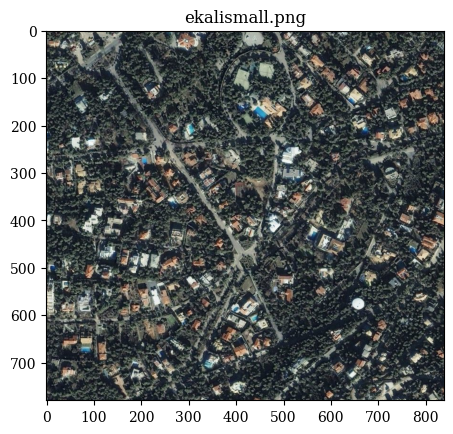

In [75]:
mat = cv2.imread(filename="ekalismall.png")
mat = cv2.cvtColor(src=mat, code=cv2.COLOR_BGR2RGB)

matplotlib.pyplot.rc('font', family='serif')
matplotlib.pyplot.title("ekalismall.png")
matplotlib.pyplot.imshow(X=mat)

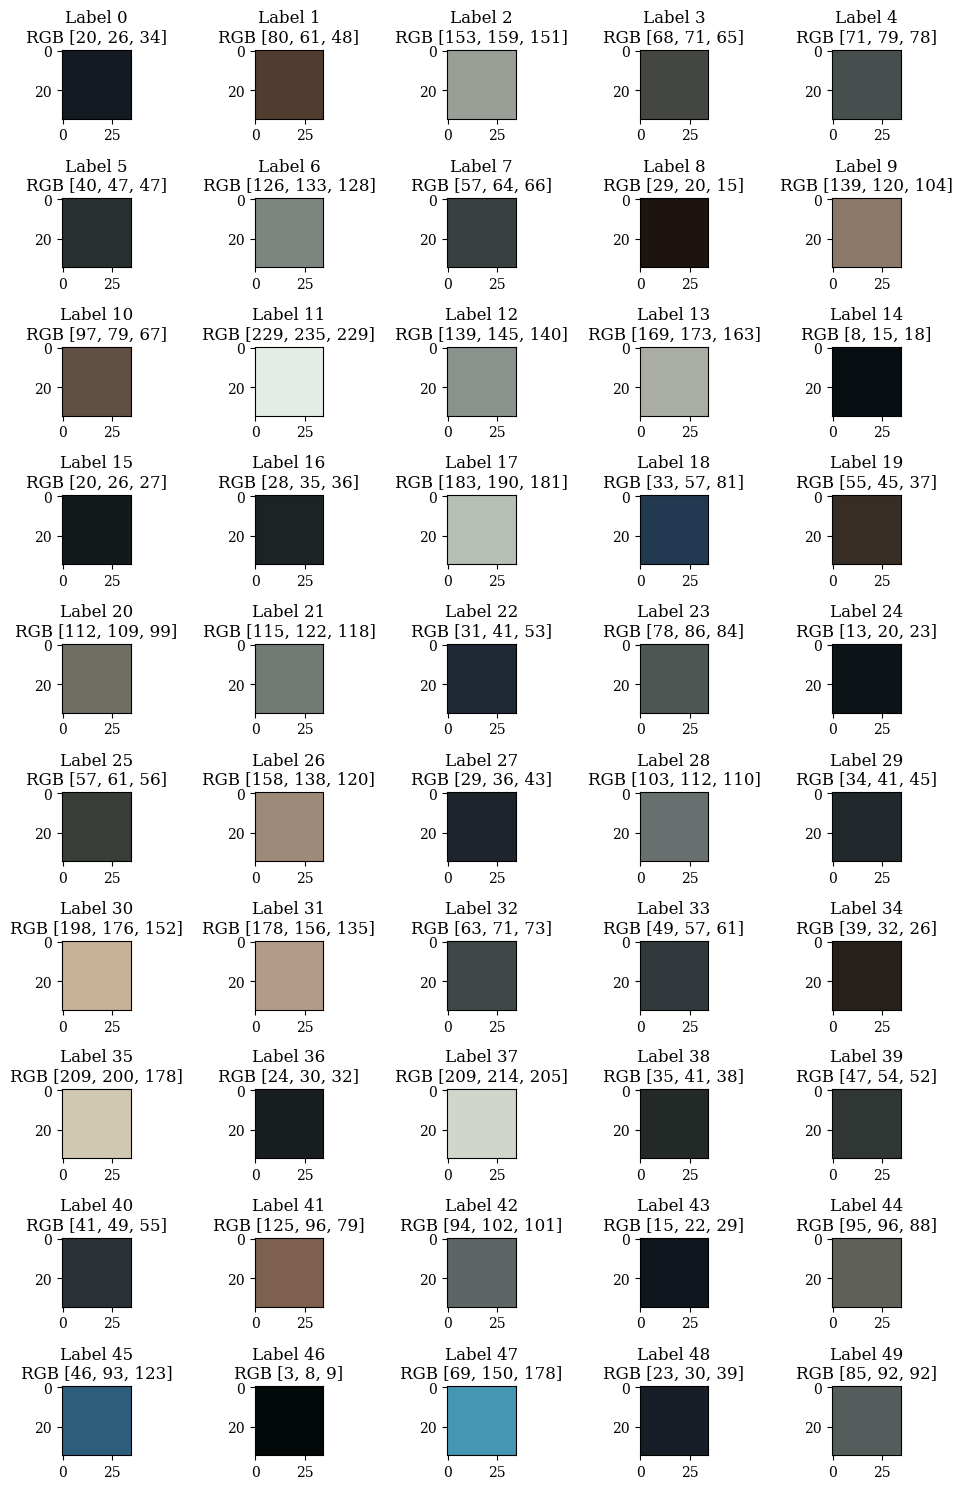

In [76]:
pool_detector = PoolDetector(num_clusters=50, tol=5e-1)
pool_detector.train_detector(X=mat)
pool_detector.plt_clusters()

From the cluster results shown above, cluster with label $47$ and $45$ are highly likely to be swimming pools because their colors are extremely close to the actual color of the swimming pool in the real world.

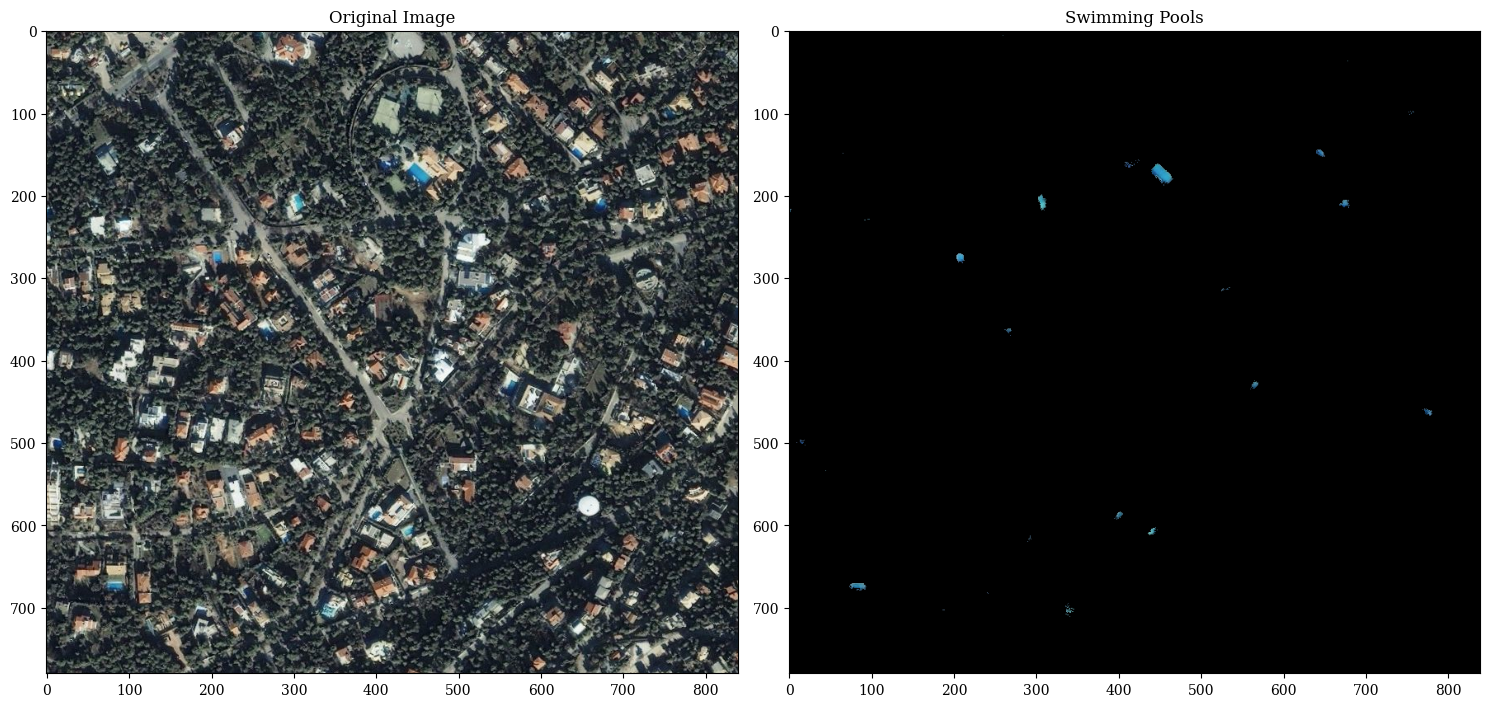

In [77]:
selected_labels = [47, 45]

pool_detector.plt_pools(labels=pool_detector.labels, selected_labels=selected_labels, mat=mat)

##### Test Swimming Pool Detector

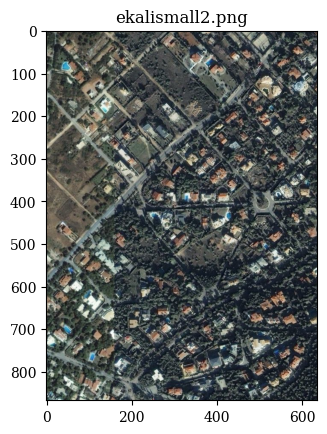

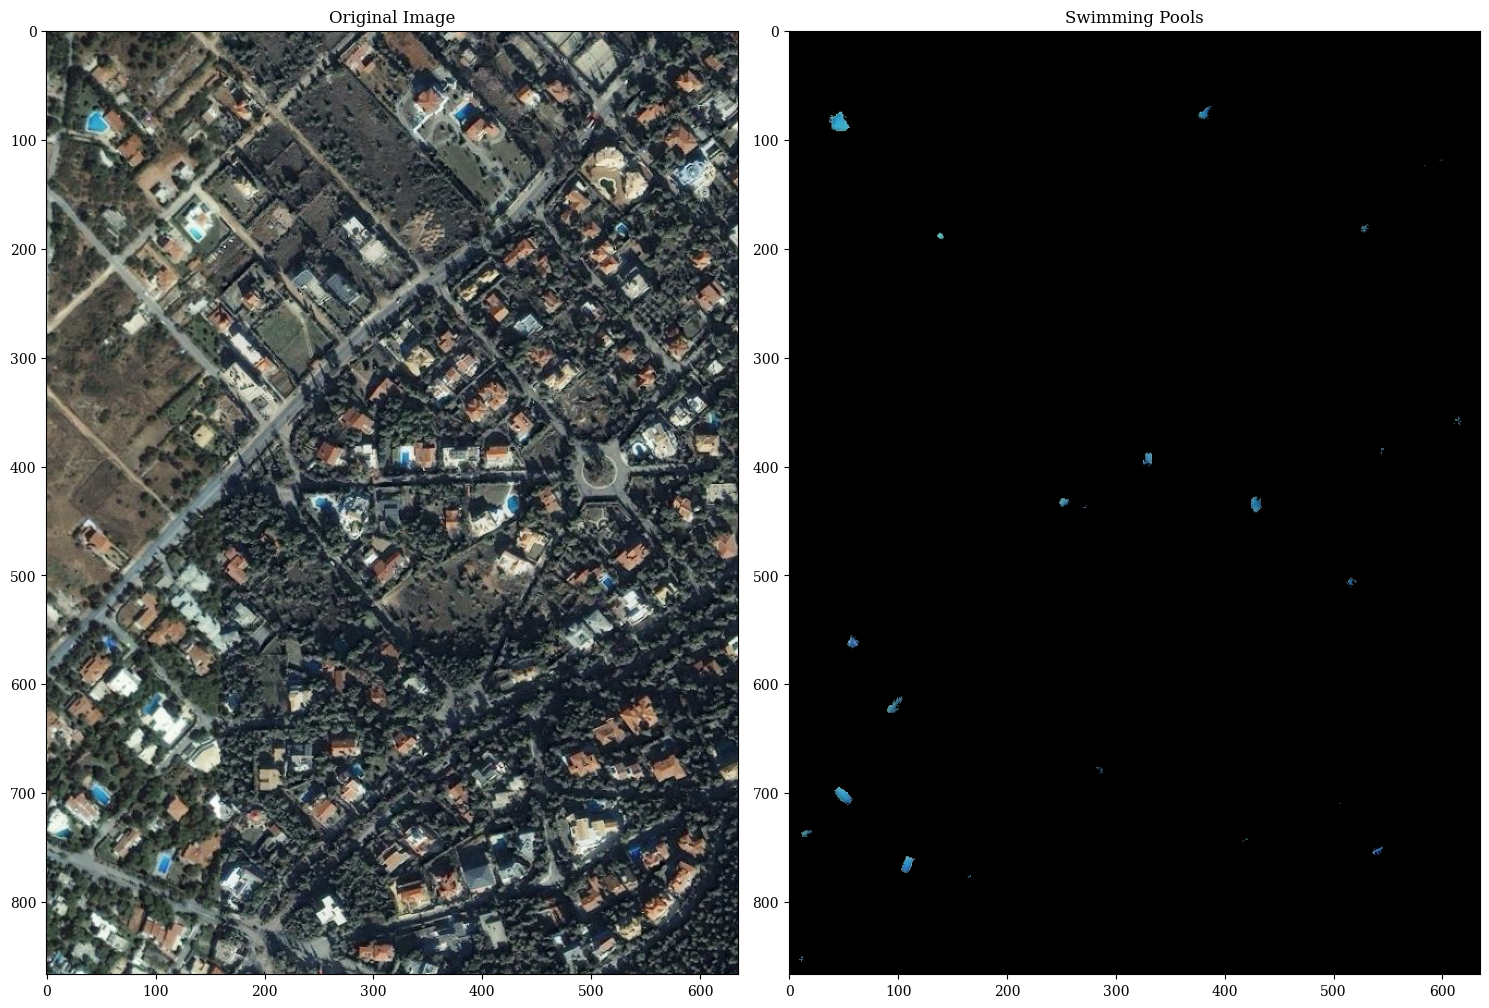

In [78]:
mat_test = cv2.imread(filename="ekalismall2.png")
mat_test = cv2.cvtColor(src=mat_test, code=cv2.COLOR_BGR2RGB)

matplotlib.pyplot.rc('font', family='serif')
matplotlib.pyplot.title("ekalismall2.png")
matplotlib.pyplot.imshow(X=mat_test)

labels = pool_detector.predict(X=mat_test)
pool_detector.plt_pools(labels=labels, selected_labels=selected_labels, mat=mat_test)